In [ ]:
!pip install -Uqq fastbook
!pip install jmd_imagescraper
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from jmd_imagescraper.core import *
from pathlib import Path

root = Path().cwd()/"images"

In [ ]:
duckduckgo_search(root, "hotdog", "hotdog", max_results=150)
duckduckgo_search(root, "not hotdog", "dumpling", max_results=10)
duckduckgo_search(root, "not hotdog", "pizza", max_results=10)
duckduckgo_search(root, "not hotdog", "burger", max_results=10)
duckduckgo_search(root, "not hotdog", "sandwich", max_results=10)
duckduckgo_search(root, "not hotdog", "noodle", max_results=10)
duckduckgo_search(root, "not hotdog", "rice", max_results=10)
duckduckgo_search(root, "not hotdog", "kebab", max_results=10)
duckduckgo_search(root, "not hotdog", "cake", max_results=10)
duckduckgo_search(root, "not hotdog", "steak", max_results=10)
duckduckgo_search(root, "not hotdog", "soup", max_results=10)
duckduckgo_search(root, "not hotdog", "burrito", max_results=10)
duckduckgo_search(root, "not hotdog", "salad", max_results=10)
duckduckgo_search(root, "not hotdog", "ice cream", max_results=10)

In [ ]:
food_types = 'hotdog','not hotdog'
path = Path('images')

In [ ]:
foods = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
foods = foods.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = foods.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.050730,0.524831,0.226415,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.224841,0.312137,0.150943,00:04
1,0.175024,0.062367,0.018868,00:04
2,0.161482,0.048318,0.018868,00:04
3,0.138220,0.039527,0.018868,00:04


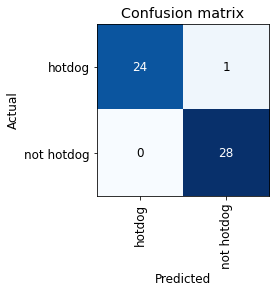

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

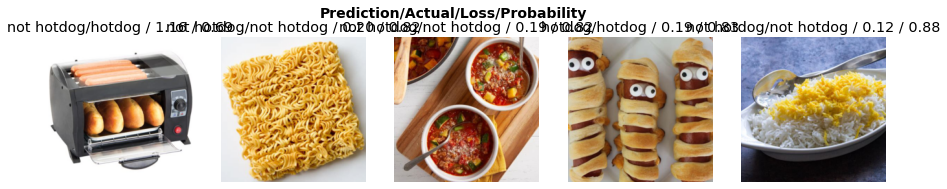

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

SuggestedLRs(lr_min=0.00010000000474974513, lr_steep=1.3182567499825382e-06)

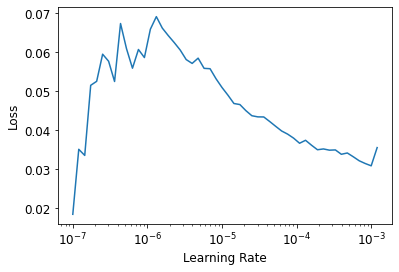

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(15, slice(1e-4,1.3e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.074236,0.036870,0.018868,00:04
1,0.060951,0.035024,0.018868,00:04
2,0.051846,0.031921,0.018868,00:04
3,0.053762,0.030675,0.018868,00:04
4,0.047879,0.029580,0.018868,00:04
5,0.045444,0.027471,0.000000,00:04
6,0.045215,0.025402,0.000000,00:04
7,0.043305,0.024926,0.000000,00:04
8,0.038508,0.024632,0.000000,00:04
9,0.036122,0.023480,0.000000,00:04


In [ ]:
learn.export()